# CUSTOMER CHURN


Random Forest Model Evaluation:
Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



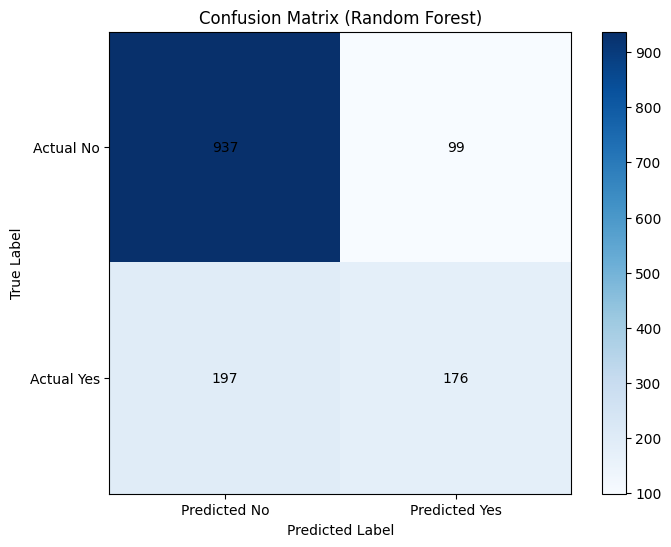


Confusion Matrix:
 [[937  99]
 [197 176]]


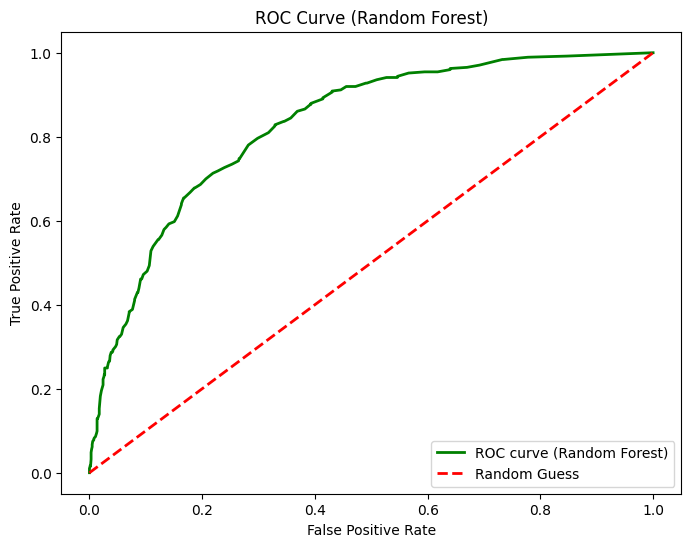


Area Under the Curve (AUC): 0.83


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv("Telco-Customer-Churn.csv")
df.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService', 
                                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)


print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:\n", class_report_rf)


plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_rf, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.colorbar()
plt.xticks([0, 1], ['Predicted No', 'Predicted Yes'])
plt.yticks([0, 1], ['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix_rf[i, j], ha='center', va='center', color='black')
plt.show()

print("\nConfusion Matrix:\n", conf_matrix_rf)



y_prob_rf = model_rf.predict_proba(X_test_scaled)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_prob_rf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve (Random Forest)')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

print(f"\nArea Under the Curve (AUC): {auc_score_rf:.2f}")